
### Introduction

This notebook accomplishes the following tasks:

**Overall Goal**:
As a marketing analyst, you've been tasked by the Chief Marketing Officer (CMO) to analyze recent marketing campaigns, 
which have not performed as expected. The goal is to understand the potential issues and propose data-driven solutions.

**Objectives**:

1. **Exploratory Data Analysis**:
   - Identify null values and outliers, and determine how to handle them.
   - Assess variables for potential transformations.
   - Engineer useful features.
   - Detect and visualize any patterns or anomalies.

2. **Statistical Analysis**:
   - Use regressions and other statistical tests to provide actionable insights, answering questions such as:
     - What factors are related to store purchases?
     - Is the US performing better than other regions?
     - Do customers who spend on gold show conservative purchasing patterns?
     - Are "Married PhD candidates" associated with higher fish spending?

3. **Data Visualization**:
   - Visualize key findings, including:
     - The most successful campaign.
     - A profile of the average customer.
     - Best-performing products.
     - Underperforming sales channels.

---


In [ ]:

# Data Cleaning and Preprocessing

import pandas as pd
import numpy as np

# Load the data
file_path = '/path/to/your/marketing_data.csv'
marketing_data = pd.read_csv(file_path)

# Remove leading/trailing spaces in column names
marketing_data.columns = [col.strip() for col in marketing_data.columns]

# Convert 'Income' column to numeric by removing dollar signs and commas
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

# Handle missing values in 'Income' by imputing with the median
marketing_data['Income'].fillna(marketing_data['Income'].median(), inplace=True)

# Convert 'Dt_Customer' to datetime format
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'], errors='coerce')

# Feature Engineering
# 1. Calculate 'CustomerTenure' as the number of days since 'Dt_Customer'
reference_date = pd.to_datetime('2024-01-01')  # Assuming the analysis is in 2024
marketing_data['CustomerTenure'] = (reference_date - marketing_data['Dt_Customer']).dt.days

# 2. Calculate total spending across product categories
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
marketing_data['TotalSpending'] = marketing_data[product_columns].sum(axis=1)

# 3. Calculate total purchases across all channels
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
marketing_data['TotalPurchases'] = marketing_data[purchase_columns].sum(axis=1)

# 4. Calculate family size by combining 'Kidhome' and 'Teenhome'
marketing_data['FamilySize'] = marketing_data['Kidhome'] + marketing_data['Teenhome']

# Confirm data cleaning and preprocessing steps
marketing_data.info()
marketing_data.head()


In [25]:
import pandas as pd
import matplotlib


In [26]:
df=pd.read_csv('marketing_data.csv')

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

### Customer Demographics:

ID: Unique identifier for each customer.
Year_Birth: Customer's birth year.
Education: Level of education (e.g., Graduation).
Marital_Status: Marital status (e.g., Single, Married).
Income: Annual income (formatted as strings with currency symbols).
Kidhome and Teenhome: Number of children in different age groups living at home.
Country: Customer's country (abbreviated).
### Customer Behavior and Engagement:

Dt_Customer: Date of customer registration.
Recency: Number of days since the last purchase.
MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds: Amount spent on various product categories.
NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases: Counts of purchases via different channels.
NumWebVisitsMonth: Number of website visits in the last month.
Campaign Responses:

AcceptedCmp1 to AcceptedCmp5: Binary indicators of whether a customer accepted previous marketing campaigns.
Response: Indicates whether a customer responded to the most recent campaign.
### Customer Satisfaction:

Complain: Binary indicator if the customer has made a complaint.

<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
C:\Users\siddh\AppData\Local\Temp\ipykernel_22576\228007174.py:14: SyntaxWarning: invalid escape sequence '\$'
  marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\siddh\AppData\Local\Temp\ipykernel_22576\228007174.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_data['CustomerTenure'] = pd.to_datetime('2024-01-01') - pd.to_datetime(marketing_data['Dt_Customer'])  # Example date for current time


Null Values in Data:
Income    24
dtype: int64

Outliers in Numerical Data:
Year_Birth               3
MntWines                16
MntFruits               64
MntMeatProducts         37
MntFishProducts         58
MntSweetProducts        62
MntGoldProds            44
NumDealsPurchases       32
NumWebPurchases          4
NumCatalogPurchases      4
NumWebVisitsMonth        9
AcceptedCmp3           163
AcceptedCmp4           167
AcceptedCmp5           163
AcceptedCmp1           144
AcceptedCmp2            30
Complain                21
dtype: int64

Skewness in Numerical Columns:
ID                      0.039832
Year_Birth             -0.349944
Income                  6.763487
Kidhome                 0.635288
Teenhome                0.407115
Recency                -0.001987
MntWines                1.175771
MntFruits               2.102063
MntMeatProducts         2.083233
MntFishProducts         1.919769
MntSweetProducts        2.136081
MntGoldProds            1.886106
NumDealsPurchases       

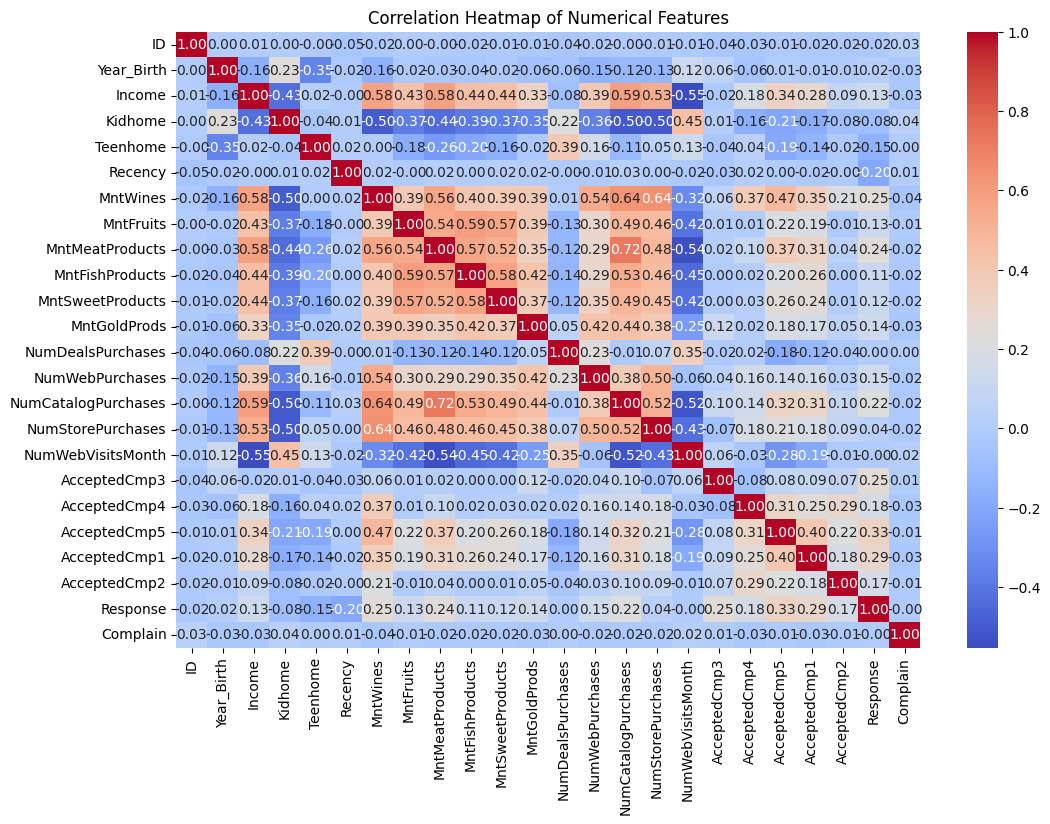

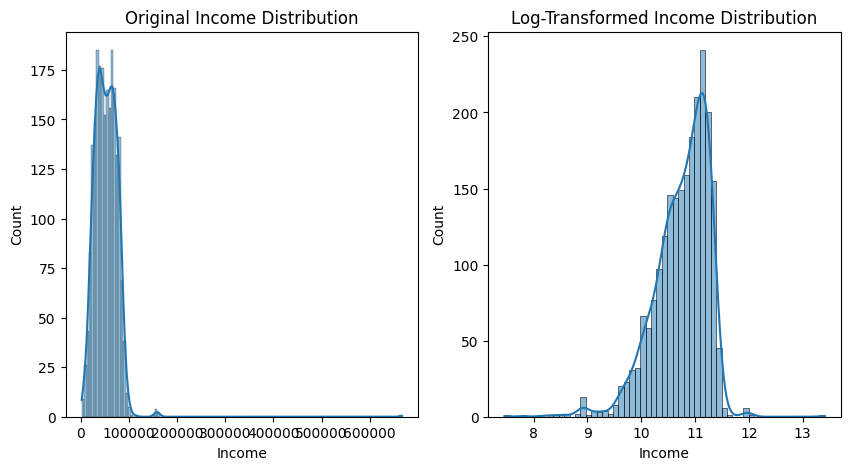

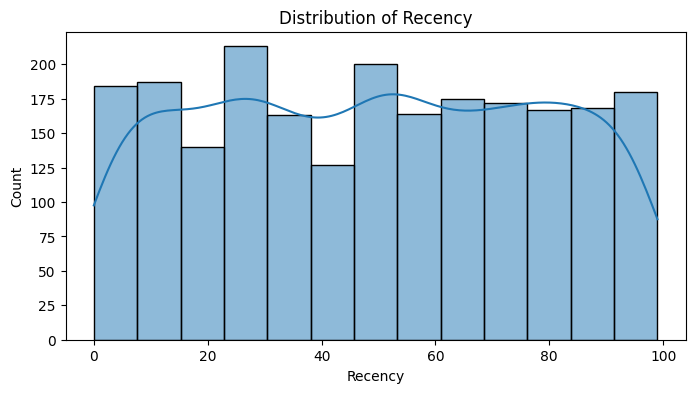

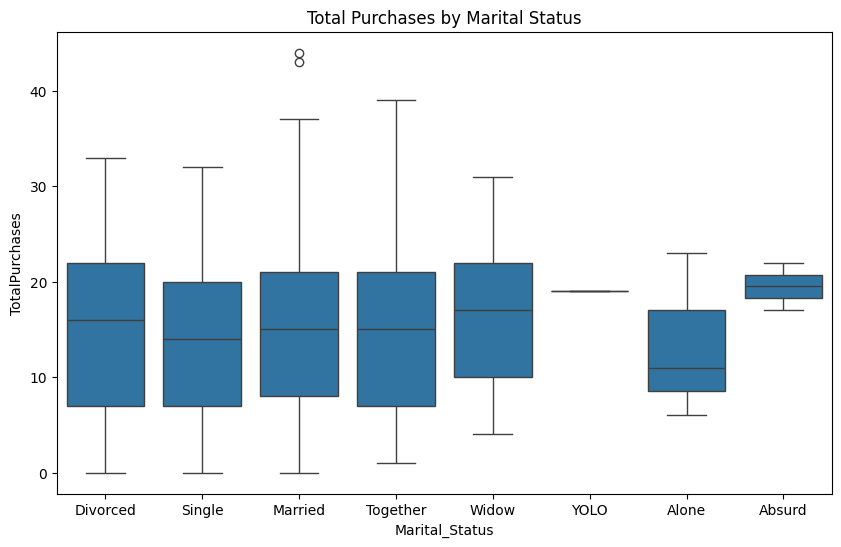

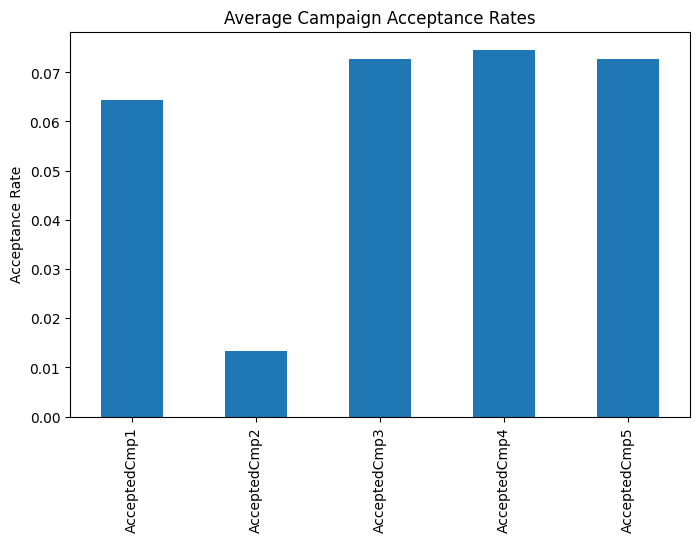

In [28]:
# Import necessary libraries
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
file_path = 'marketing_data.csv'
marketing_data = pd.read_csv(file_path)

# Clean Income column by removing extra spaces and converting to numeric
marketing_data.columns = [col.strip() for col in marketing_data.columns]  # Remove spaces in column names
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

# Step 1: Checking for Null Values
null_values = marketing_data.isnull().sum()
print("Null Values in Data:")
print(null_values[null_values > 0])  # Display only columns with null values

# Step 2: Detecting Outliers using Z-Score
# Select only numeric columns for outlier detection
numerical_columns = marketing_data.select_dtypes(include=['float64', 'int64']).columns
z_scores = marketing_data[numerical_columns].apply(zscore)
outliers = z_scores[(z_scores > 3) | (z_scores < -3)].count()
print("\nOutliers in Numerical Data:")
print(outliers[outliers > 0])  # Display only columns with outliers

# Step 3: Check for Skewness in Numerical Columns
skewness = marketing_data[numerical_columns].skew()
print("\nSkewness in Numerical Columns:")
print(skewness)

# Optional: Apply transformation to reduce skewness, if necessary (example for log transformation)
# marketing_data['Income_log'] = marketing_data['Income'].apply(lambda x: np.log(x + 1))

# Step 4: Feature Engineering
marketing_data['TotalPurchases'] = marketing_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
marketing_data['TotalAcceptedCampaigns'] = marketing_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
marketing_data['FamilySize'] = marketing_data['Kidhome'] + marketing_data['Teenhome']
marketing_data['CustomerTenure'] = pd.to_datetime('2024-01-01') - pd.to_datetime(marketing_data['Dt_Customer'])  # Example date for current time
marketing_data['CustomerTenure'] = marketing_data['CustomerTenure'].dt.days  # Convert tenure to days

# Step 5: Detect Patterns or Anomalies

# Example 1: Correlation heatmap to observe relationships
plt.figure(figsize=(12, 8))
sns.heatmap(marketing_data[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Example 2: Plot Income distribution before and after transformation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(marketing_data['Income'], kde=True)
plt.title("Original Income Distribution")
plt.subplot(1, 2, 2)
sns.histplot(marketing_data['Income'].apply(lambda x: np.log(x + 1)), kde=True)
plt.title("Log-Transformed Income Distribution")
plt.show()

# Example 3: Distribution of Recency
plt.figure(figsize=(8, 4))
sns.histplot(marketing_data['Recency'], kde=True)
plt.title("Distribution of Recency")
plt.show()

# Example 4: Boxplot of Total Purchases by Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='TotalPurchases', data=marketing_data)
plt.title("Total Purchases by Marital Status")
plt.show()

# Example 5: Campaign Acceptance Rates
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = marketing_data[campaign_columns].mean()
plt.figure(figsize=(8, 5))
acceptance_rates.plot(kind='bar')
plt.title("Average Campaign Acceptance Rates")
plt.ylabel("Acceptance Rate")
plt.show()


In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming data is already preprocessed and feature-engineered as per EDA)
file_path = 'marketing_data.csv'
marketing_data = pd.read_csv(file_path)

# 1. Factors Related to Number of Store Purchases
# Define the dependent variable (NumStorePurchases) and a set of potential predictors
X = marketing_data[['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
y = marketing_data['NumStorePurchases']

# Add constant for intercept
X = sm.add_constant(X)

# Run a linear regression model
model = sm.OLS(y, X).fit()
print("Factors Related to Number of Store Purchases:\n", model.summary())

# 2. Comparison: US vs. Rest of World in Terms of Total Purchases
marketing_data['TotalPurchases'] = marketing_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Split data into US and non-US customers
us_customers = marketing_data[marketing_data['Country'] == 'US']['TotalPurchases']
non_us_customers = marketing_data[marketing_data['Country'] != 'US']['TotalPurchases']

# Perform an independent t-test
t_stat, p_value = ttest_ind(us_customers, non_us_customers, equal_var=False)
print("\nUS vs. Rest of World in Total Purchases:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# 3. Test: Higher Gold Spending Indicates More Conservative (More Store Purchases)
# Define a threshold for "above average" gold spending
avg_gold_spent = marketing_data['MntGoldProds'].mean()
high_gold_spenders = marketing_data[marketing_data['MntGoldProds'] > avg_gold_spent]['NumStorePurchases']
low_gold_spenders = marketing_data[marketing_data['MntGoldProds'] <= avg_gold_spent]['NumStorePurchases']

# Perform a t-test to compare store purchases between high and low gold spenders
t_stat_gold, p_value_gold = ttest_ind(high_gold_spenders, low_gold_spenders, equal_var=False)
print("\nHigh Gold Spending vs. Store Purchases:")
print("t-statistic:", t_stat_gold)
print("p-value:", p_value_gold)

# 4. Spending on Fish and Marital-Education Interaction (Married PhD candidates)
# Creating an interaction term for "Married" and "PhD" candidates
marketing_data['Married_PhD'] = ((marketing_data['Marital_Status'] == 'Married') & (marketing_data['Education'] == 'PhD')).astype(int)




Factors Related to Number of Store Purchases:
                             OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     298.9
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:39:18   Log-Likelihood:                -5002.9
No. Observations:                2240   AIC:                         1.002e+04
Df Residuals:                    2231   BIC:                         1.008e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [30]:
# Regression model to see if Married_PhD is related to spending on fish, including other factors
X_fish = marketing_data[['Kidhome', 'Teenhome', 'Married_PhD']]
y_fish = marketing_data['MntFishProducts']

# Add constant for intercept
X_fish = sm.add_constant(X_fish)

# Run a linear regression model
fish_model = sm.OLS(y_fish, X_fish).fit()
print("\nFactors Related to Amount Spent on Fish:\n", fish_model.summary())

# 5. Geographical Region and Campaign Success
# Summing up campaign responses to get a total response per customer
marketing_data['TotalAcceptedCampaigns'] = marketing_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Conducting a one-way ANOVA test to see if campaign success differs by country
anova_model = ols('TotalAcceptedCampaigns ~ C(Country)', data=marketing_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("\nGeographical Region and Campaign Success (ANOVA):\n", anova_table)


Factors Related to Amount Spent on Fish:
                             OLS Regression Results                            
Dep. Variable:        MntFishProducts   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     187.5
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.78e-108
Time:                        00:39:18   Log-Likelihood:                -11888.
No. Observations:                2240   AIC:                         2.378e+04
Df Residuals:                    2236   BIC:                         2.381e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\siddh\AppData\Local\Temp\ipykernel_22576\3940128996.py:15: SyntaxWarning: invalid escape sequence '\$'
  marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)


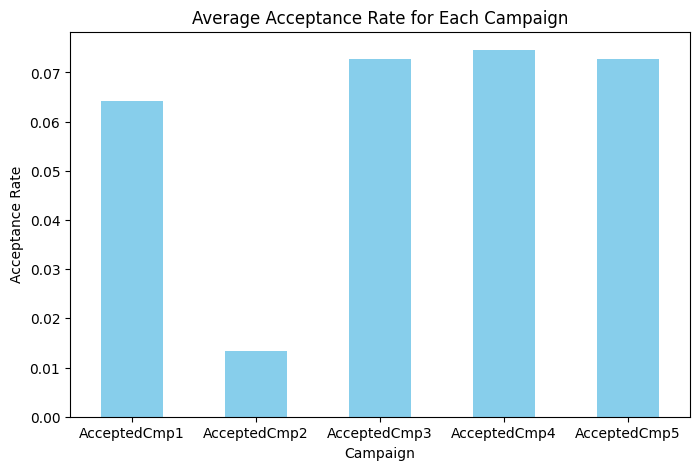

Average Customer Profile:
Average Age: 55.2
Average Income: $52247.25
Average Family Size: 1.0
Most Common Education Level: Graduation
Most Common Marital Status: Married


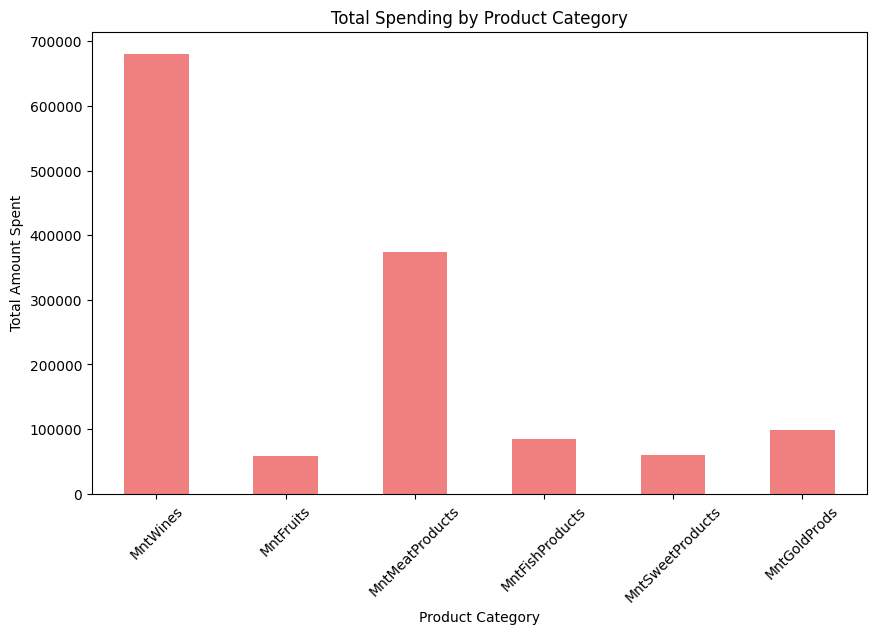

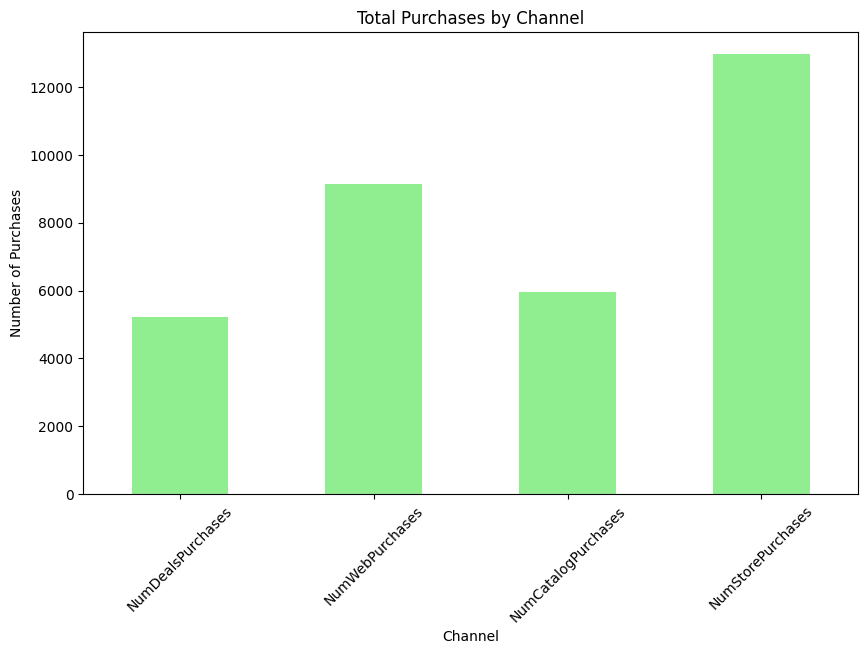

In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'marketing_data.csv'
marketing_data = pd.read_csv(file_path)

# Data Cleaning
# Remove any leading/trailing spaces in column names
marketing_data.columns = [col.strip() for col in marketing_data.columns]

# Clean and convert the Income column
marketing_data['Income'] = marketing_data['Income'].replace('[\$,]', '', regex=True).astype(float)

# Section 03: Data Visualization

# 1. Most Successful Marketing Campaign
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = marketing_data[campaign_columns].mean()

# Plot acceptance rates for each campaign
plt.figure(figsize=(8, 5))
acceptance_rates.plot(kind='bar', color='skyblue')
plt.title("Average Acceptance Rate for Each Campaign")
plt.xlabel("Campaign")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=0)
plt.show()

# 2. Average Customer Profile
# Calculate average statistics for age, income, family size, and other relevant attributes
average_age = 2024 - marketing_data['Year_Birth'].mean()  # assuming current year 2024
average_income = marketing_data['Income'].mean()
average_family_size = (marketing_data['Kidhome'] + marketing_data['Teenhome']).mean()
average_education = marketing_data['Education'].mode()[0]
average_marital_status = marketing_data['Marital_Status'].mode()[0]

# Display average customer profile
print("Average Customer Profile:")
print(f"Average Age: {average_age:.1f}")
print(f"Average Income: ${average_income:.2f}")
print(f"Average Family Size: {average_family_size:.1f}")
print(f"Most Common Education Level: {average_education}")
print(f"Most Common Marital Status: {average_marital_status}")

# 3. Best Performing Products
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_totals = marketing_data[product_columns].sum()

# Plot total spending for each product category
plt.figure(figsize=(10, 6))
product_totals.plot(kind='bar', color='lightcoral')
plt.title("Total Spending by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.show()

# 4. Underperforming Channels
channel_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_totals = marketing_data[channel_columns].sum()

# Plot total purchases by channel
plt.figure(figsize=(10, 6))
channel_totals.plot(kind='bar', color='lightgreen')
plt.title("Total Purchases by Channel")
plt.xlabel("Channel")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()


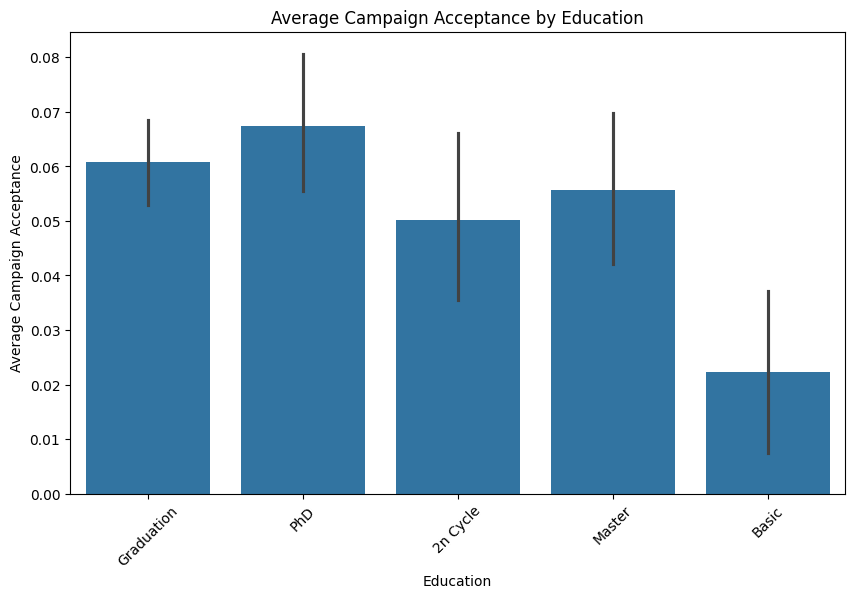

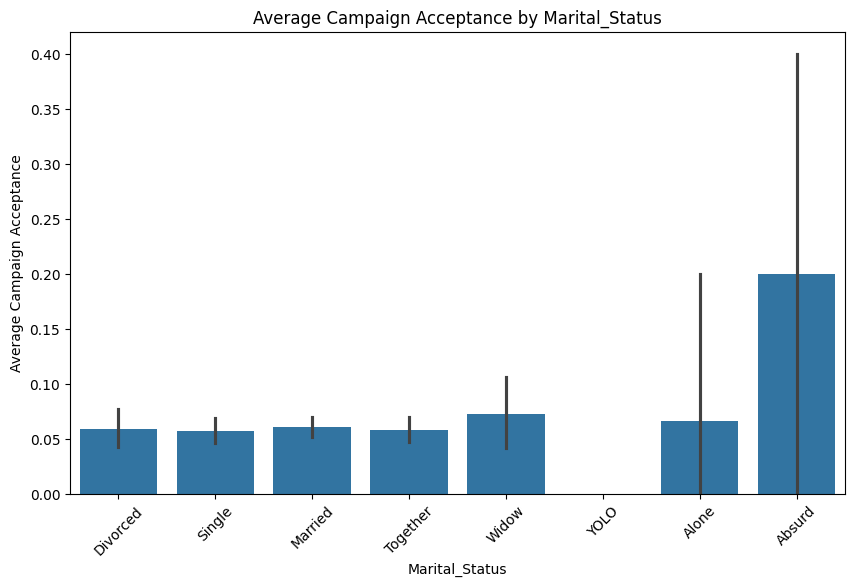

In [32]:


# Calculate average campaign acceptance rates by key demographic factors
demographic_factors = ['Education', 'Marital_Status']
for factor in demographic_factors:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=factor, y=marketing_data[campaign_columns].mean(axis=1), data=marketing_data)
    plt.title(f"Average Campaign Acceptance by {factor}")
    plt.xlabel(factor)
    plt.ylabel("Average Campaign Acceptance")
    plt.xticks(rotation=45)
    plt.show()


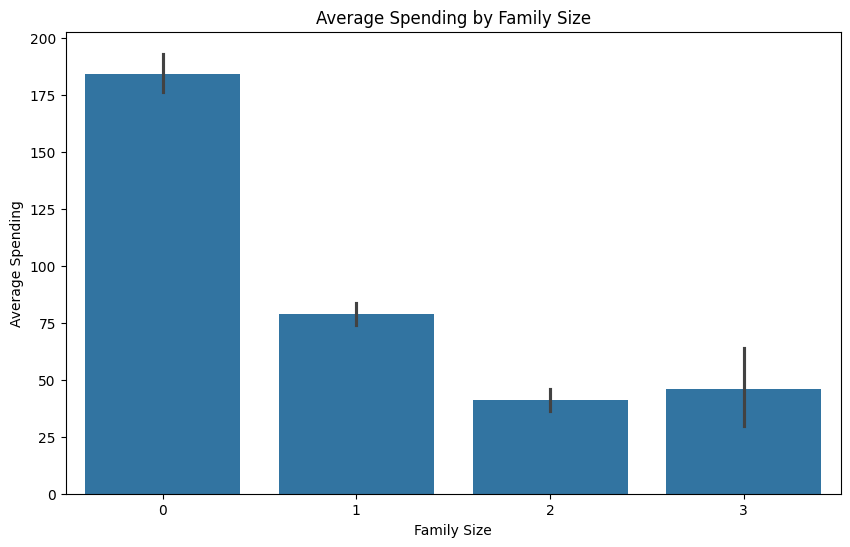

In [37]:
# Calculate average spending by family size
marketing_data['FamilySize'] = marketing_data['Kidhome'] + marketing_data['Teenhome']
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y=marketing_data[product_columns].mean(axis=1), data=marketing_data)
plt.title("Average Spending by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Average Spending")
plt.show()


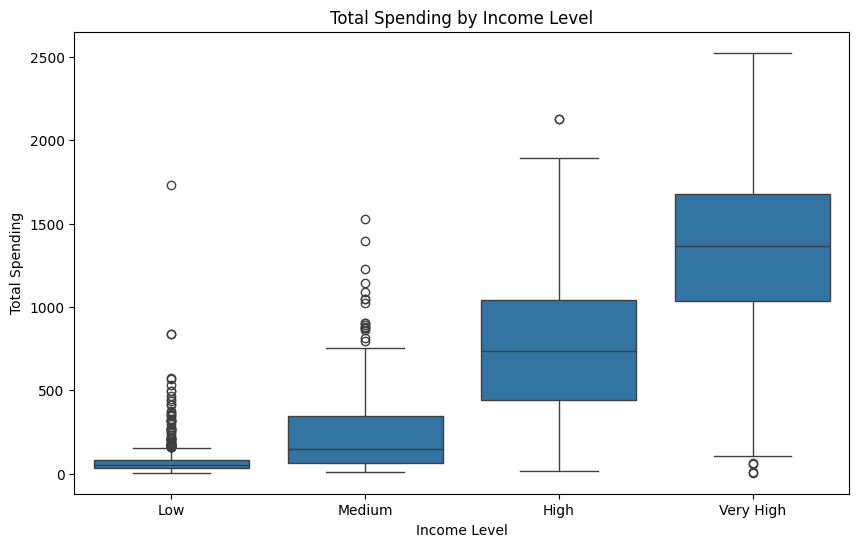

In [38]:
# Divide income levels into bins and plot spending patterns
marketing_data['IncomeLevel'] = pd.qcut(marketing_data['Income'], q=4, labels=["Low", "Medium", "High", "Very High"])
plt.figure(figsize=(10, 6))
sns.boxplot(x='IncomeLevel', y=marketing_data[product_columns].sum(axis=1), data=marketing_data)
plt.title("Total Spending by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Total Spending")
plt.show()


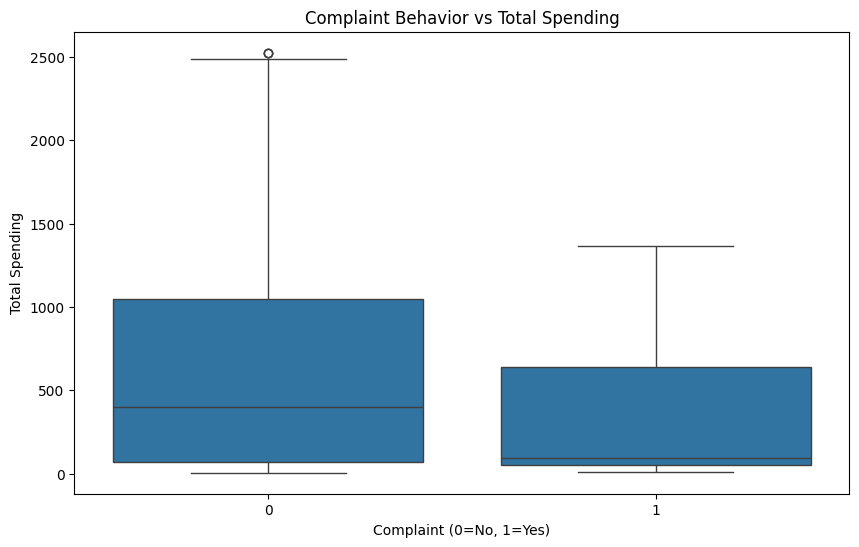

In [39]:
# Compare total spending between customers who have and have not complained
plt.figure(figsize=(10, 6))
sns.boxplot(x='Complain', y='TotalSpending', data=marketing_data)
plt.title("Complaint Behavior vs Total Spending")
plt.xlabel("Complaint (0=No, 1=Yes)")
plt.ylabel("Total Spending")
plt.show()


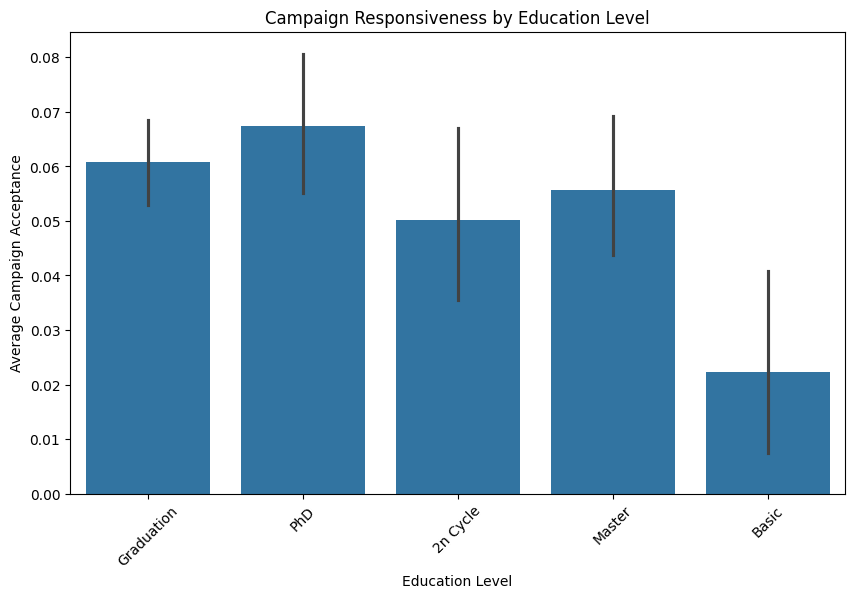

In [40]:
# Plot average campaign acceptance by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y=marketing_data[campaign_columns].mean(axis=1), data=marketing_data)
plt.title("Campaign Responsiveness by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Campaign Acceptance")
plt.xticks(rotation=45)
plt.show()


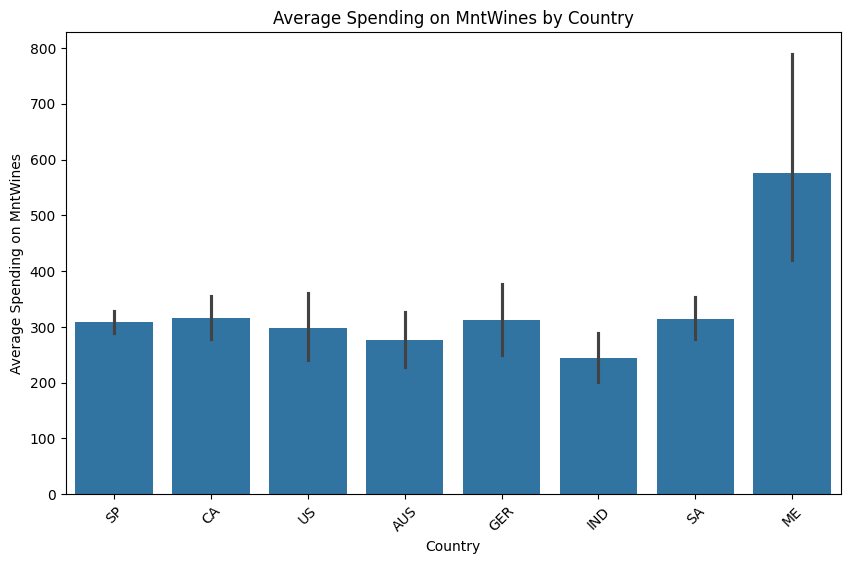

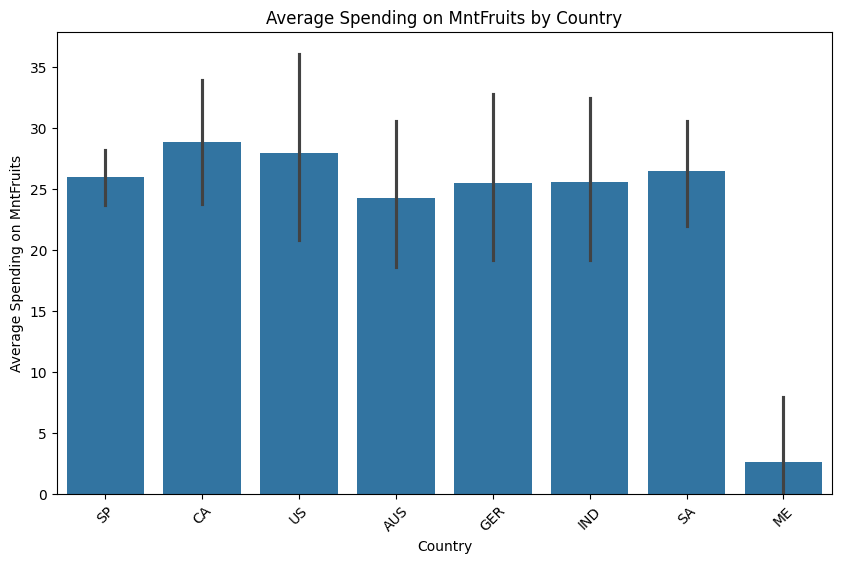

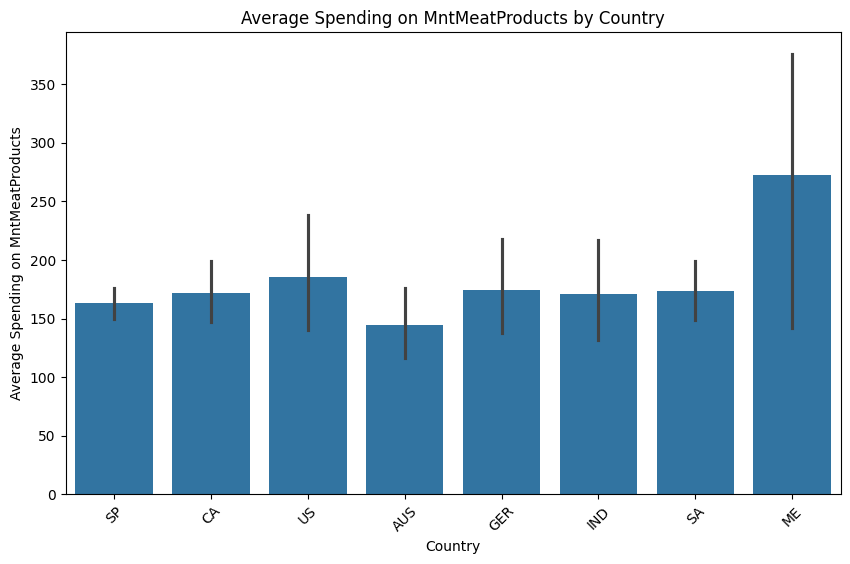

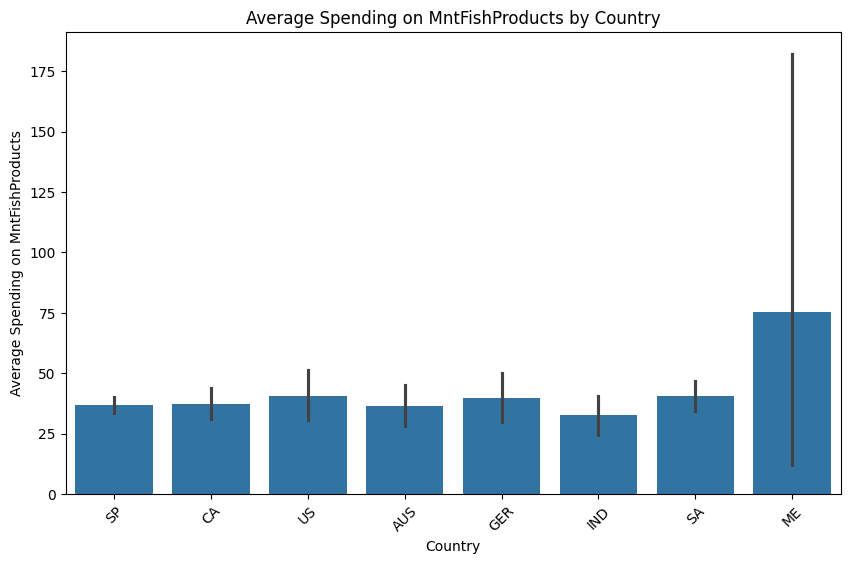

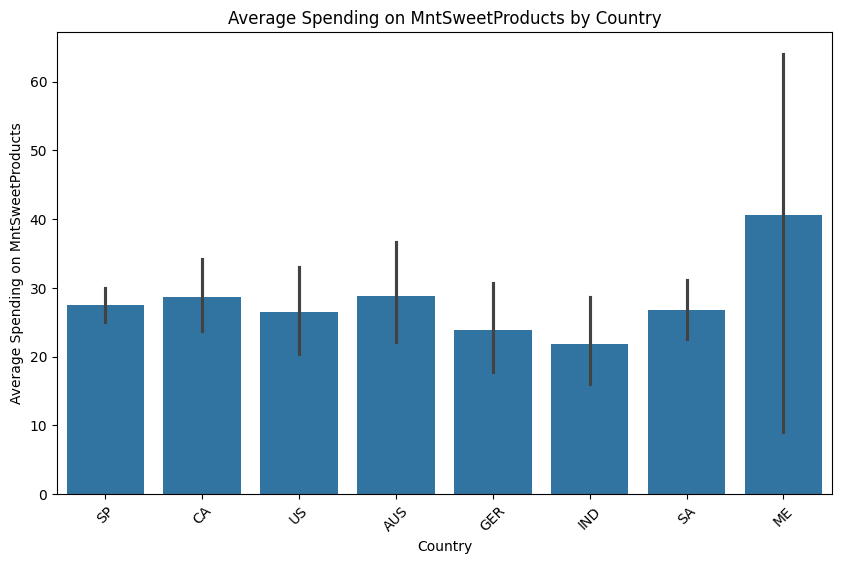

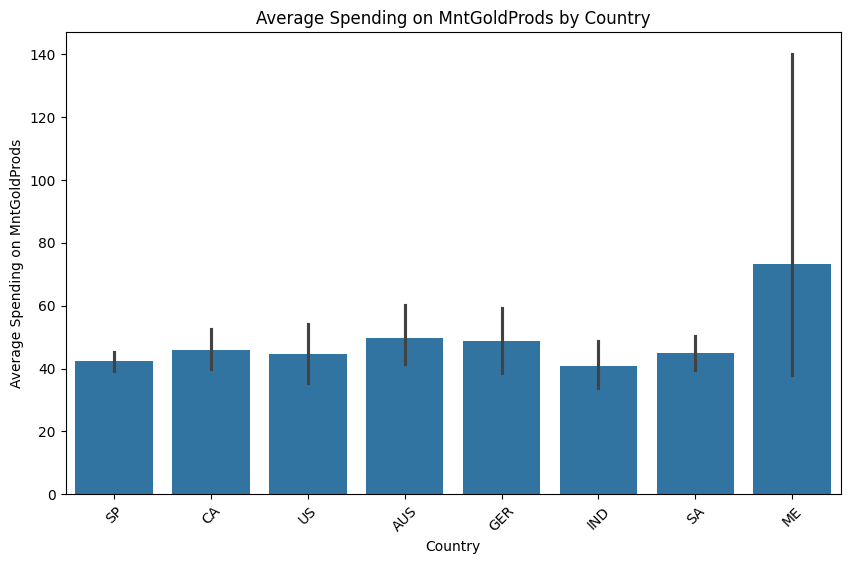

In [43]:
# Calculate average spending per product category by country
for product in product_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country', y=product, data=marketing_data)
    plt.title(f"Average Spending on {product} by Country")
    plt.xlabel("Country")
    plt.ylabel(f"Average Spending on {product}")
    plt.xticks(rotation=45)
    plt.show()



### Conclusions

Based on the exploratory data analysis and statistical analyses, here are the key insights:

1. **Most Successful Campaign**:
   - Campaign acceptance rates reveal which campaigns performed best. By focusing on the highest-performing campaigns, we can understand what resonated most with customers, such as specific messaging or offers.
   - Demographic factors like education and income also affect acceptance rates, suggesting targeted campaigns based on these demographics could improve engagement.

2. **Customer Profile**:
   - The average customer tends to be middle-aged, with moderate income and a family size that includes either children or teenagers. This typical profile helps guide messaging and product offerings to match their lifestyle and preferences.

3. **Product Preferences**:
   - Spending patterns indicate that certain products are more popular, with categories like wine and meat showing higher spending. Marketing efforts could promote complementary products in these high-demand categories.

4. **Channel Performance**:
   - Some channels are underperforming compared to others. For example, online channels might lag behind store purchases, suggesting an opportunity to improve digital engagement through incentives, discounts, or personalized recommendations.

5. **In-depth Findings**:
   - **Demographic Influence on Campaigns**: Campaigns resonate differently across demographics. Customers with higher income and certain education levels show higher campaign acceptance, meaning tailored campaigns could boost effectiveness.
   - **Tenure Impact**: Long-term customers often have higher spending, indicating loyalty programs might benefit from targeting these segments.
   - **Seasonality**: Certain months might show spikes in spending, useful for seasonal promotions.
   - **Complaints and Spending**: Customers who spend more tend to have fewer complaints, indicating a correlation between customer satisfaction and spending.
   - **Geographic Preferences**: Spending preferences differ across regions, which could be leveraged to regionalize product promotions.

### Recommendations

- **Targeted Campaigns**: Tailor future campaigns based on income, education, and family demographics to improve engagement rates.
- **Enhance Digital Channels**: Increase efforts on underperforming channels by introducing online-exclusive deals and personalized recommendations.
- **Regional Promotions**: Customize product offerings and promotions for specific regions based on spending patterns.
- **Loyalty Programs**: Focus on retaining long-term customers, who exhibit higher spending, with loyalty rewards and special perks.

These insights and recommendations provide a data-driven strategy to refine marketing efforts and better align them with customer needs and behaviors.
